In [1]:
from __future__ import print_function, division
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t0 = time.time()
df_train = pd.read_csv('./data/train.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
#df_train.head(5)

#type(df_train)


35.55 secs ==> pd.read_csv


In [46]:
num_click= df_train.where (df_train['click']>0)
num_click['click'].count()

1793

In [10]:
df_train['region'].unique()

array([  2, 238,  40,   1, 216, 276,  80,  15, 333, 308, 298,  55,  79,
       374,  27,  94, 183, 164, 134, 344,   0, 146, 106,   3, 394, 124,
       201, 275,  65, 393, 253, 368, 359, 325, 395])

In [48]:
df_train['advertiser'].count()

2430981

In [49]:
ad_group=df_train.groupby(df_train['advertiser'])
Clicks = ad_group['click'].sum()
Clicks

advertiser
1458    385
2259     43
2261     36
2821    131
2997    217
3358    202
3386    320
3427    272
3476    187
Name: click, dtype: int64

In [50]:
Bids = ad_group['bidid'].count()
#Bids


In [51]:
Imps = ad_group['userid'].count()
#Imps 

In [52]:
win_df=df_train.where(df_train['bidprice'] >= df_train['payprice'])
win=win_df['bidid'].count()
total=df_train['bidid'].count()
rate=win/total


In [53]:
#df_train.sort_values(by='advertiser',ascending=True)
#df_train.sort_index(axis=1, ascending=False)
#df1=df_train.sort_index(ascending=False)
#df1.head(7)

In [54]:
Cost = (ad_group['payprice'].sum())/1000
#Cost

In [55]:
CTR=Clicks/Imps
#CTR

In [56]:
eCPC=(Cost)/Clicks
#eCPC

In [57]:
CPM=Cost/Imps*1000
#CPM

In [58]:
df=pd.DataFrame([Bids,Imps,Clicks,Cost,CTR,CPM,eCPC],['Bids','Imps','Clicks','Cost','CTR','CPM','eCPC'])
df.T

,Bids,Imps,Clicks,Cost,CTR,CPM,eCPC
advertiser,,,,,,,
1458,492353.0,492353.0,385.0,33968.736,0.000782,68.992646,88.230483
2259,133673.0,133673.0,43.0,12428.238,0.000322,92.974931,289.028791
2261,110122.0,110122.0,36.0,9873.779,0.000327,89.662184,274.271639
2821,211366.0,211366.0,131.0,18828.044,0.000620,89.077922,143.725527
2997,49829.0,49829.0,217.0,3129.267,0.004355,62.800116,14.420585
3358,264956.0,264956.0,202.0,22447.231,0.000762,84.720599,111.124906
3386,455041.0,455041.0,320.0,34931.823,0.000703,76.766320,109.161947
3427,402806.0,402806.0,272.0,30458.711,0.000675,75.616329,111.980555
3476,310835.0,310835.0,187.0,23918.779,0.000602,76.950083,127.907909


In [59]:
#2259 and 2261

In [60]:
se_df=df_train[df_train.advertiser == 2259]
#se_df.head(5)
Clicks_se = se_df['click'].sum()
Imps_se = se_df['userid'].count()
CTR_se=Clicks_se/Imps_se
CTR_se

0.00032168051887815791

In [61]:
se2_df=df_train[df_train.advertiser == 2261]
#se_df.head(5)
Clicks_se2 = se2_df['click'].sum()
Imps_se2 = se2_df['userid'].count()
CTR_se2=Clicks_se2/Imps_se2
CTR_se2

0.00032691015419262273

In [62]:

wkd=[1,2,3,4,5,6,7]
for weekday in wkd:

    Week_df2=se2_df[se2_df.weekday==weekday]
#Week1_df.head(5)
#Week1_df
    Click_week2=Week_df2['click'].sum()
    Imps_week2=Week_df2['userid'].count()
    Ctr_week2=Click_week2/Imps_week2
    print(Ctr_week2)

nan
nan
0.000322489619865
0.000296507145822
0.000353596369744
0.000339904826649
nan


/Users/wanghan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [142]:
se_df=df_train[df_train.advertiser == 2259]
wkd=[1,2,3,4,5,6,7]
for weekday in wkd:

    Week_df=se_df[se_df.weekday==weekday]
#Week1_df.head(5)
#Week1_df
    Click_week=Week_df['click'].sum()
    Imps_week=Week_df['userid'].count()
    Ctr_week=Click_week/Imps_week
    print(Ctr_week)
#week_CTR=pd.Series(Ctr_week,['1','2','3','4','5','6','7'])
#week_CTR


0.000332581944496
nan
nan
nan
0.000272799192514
0.000320755817344
nan


/Users/wanghan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [133]:
week_CTR_1=[0.000332581944496,np.NaN,np.NaN,np.NaN, 0.000272799192514,0.000320755817344,np.NaN]
week_CTR_2=[np.NaN,np.NaN,0.000322489619865,0.000296507145822,0.000353596369744,0.000339904826649,np.NaN]

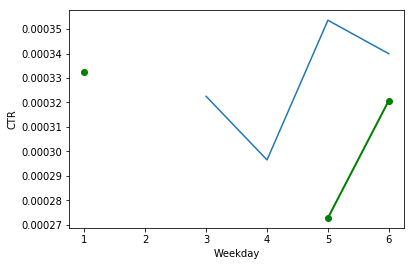

In [134]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = [1,2,3,4,5,6,7] 
y1 = week_CTR_1
y2 = week_CTR_2
plt.plot(x,y1,'go-', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.show()

In [66]:
hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for h in hour:

    hour_df=se_df[se_df.hour==h]
#Week1_df.head(5)
#Week1_df
    Click_h=hour_df['click'].sum()
    Imps_h=hour_df['userid'].count()
    Ctr_h=Click_h/Imps_h
  #  print(Ctr_h)

/Users/wanghan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [67]:
hour_CTR_2=[0.000192566917004,0.000617093489664,0.000913659205116,0.00103896103896,0.0,0.0,0.0,0.00058858151854,0.000292568753657,0.0,0.000381194409149,0.000277354042435,0.0,0.000273635244219,0.000571755288736,0.000355871886121,0.000147026391237,0.000500709338229,0.000333277787035,0,0,0,0,0]

In [68]:
hour_CTR_1=[0.000106010813103,0.0,0.000780234070221,0.000470035252644,0.000324044069994,0.0,0.00064892926671,0.00063211125158,0.000187441424555,0.000121359223301,0.000517116558072,0.000432479186939,0.000443557329785,0.00053129316757,0.000198590010922,0.000198098256735,0.000201106083459,0.000349283967866,0.000611620795107,0.0,0.0,0,0,0]

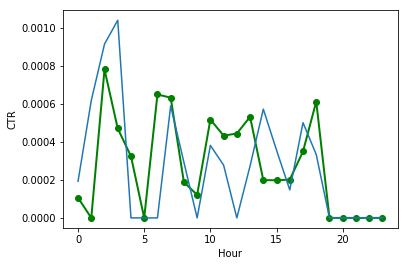

In [69]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = hour
y1 = hour_CTR_1
y2 = hour_CTR_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Hour')
plt.ylabel('CTR')
plt.show()
plt.legend() 

In [70]:
#se_df=df_train[df_train.advertiser == 2259] se2_df 2261
# os window 2259
os_w=se_df.where(se_df['useragent'].str.contains('window')>0)

Clicks_os_w = os_w['click'].sum()
Imps_os_w = os_w['userid'].count()
CTR_os_w=Clicks_os_w/Imps_os_w
CTR_os_w

0.00031145548465512

In [71]:
#os android 2259
os_and=se_df.where(se_df['useragent'].str.contains('android')>0)

Clicks_os_and = os_and['click'].sum()
Imps_os_and = os_and['userid'].count()
CTR_os_and=Clicks_os_and/Imps_os_and
CTR_os_and

0.005076142131979695

In [72]:
#os ios 2259
os_ios=se_df.where(se_df['useragent'].str.contains('ios')>0)

Clicks_os_ios = os_ios['click'].sum()
Imps_os_ios = os_ios['userid'].count()
CTR_os_ios=Clicks_os_ios/Imps_os_ios
CTR_os_ios

0.0

In [73]:
#os linux 2259
os_lin=se_df.where(se_df['useragent'].str.contains('linux')>0)

Clicks_os_lin = os_lin['click'].sum()
Imps_os_lin = os_lin['userid'].count()
CTR_os_lin=Clicks_os_lin/Imps_os_lin
CTR_os_lin

0.013888888888888888

In [74]:
#os other 2259
os_oth=se_df.where(se_df['useragent'].str.contains('other_')>0)

Clicks_os_oth = os_oth['click'].sum()
Imps_os_oth = os_oth['userid'].count()
CTR_os_oth=Clicks_os_oth/Imps_os_oth
CTR_os_oth

0.0

In [75]:
#os mac 2259
os_mac=se_df.where(se_df['useragent'].str.contains('mac')>0)

Clicks_os_mac= os_mac['click'].sum()
Imps_os_mac = os_mac['userid'].count()
CTR_os_mac=Clicks_os_mac/Imps_os_mac
CTR_os_mac

0.0

In [76]:
# os window 2261
os_w2=se2_df.where(se2_df['useragent'].str.contains('window')>0)

Clicks_os_w2 = os_w2['click'].sum()
Imps_os_w2 = os_w2['userid'].count()
CTR_os_w2=Clicks_os_w2/Imps_os_w2
CTR_os_w2

0.00029237835645637433

In [77]:
#os android 2261
os_and2=se2_df.where(se2_df['useragent'].str.contains('android')>0)

Clicks_os_and2 = os_and2['click'].sum()
Imps_os_and2 = os_and2['userid'].count()
CTR_os_and2=Clicks_os_and2/Imps_os_and2
CTR_os_and2

0.0019157088122605363

In [78]:
#os ios 2261
os_ios2=se2_df.where(se2_df['useragent'].str.contains('ios')>0)

Clicks_os_ios2 = os_ios2['click'].sum()
Imps_os_ios2 = os_ios2['userid'].count()
CTR_os_ios2=Clicks_os_ios2/Imps_os_ios2
CTR_os_ios2

0.0

In [79]:
#os linux 2261
os_lin2=se2_df.where(se2_df['useragent'].str.contains('linux')>0)

Clicks_os_lin2 = os_lin2['click'].sum()
Imps_os_lin2= os_lin2['userid'].count()
CTR_os_lin2=Clicks_os_lin2/Imps_os_lin2
CTR_os_lin2

0.0

In [80]:
#os other 2261
os_oth2=se2_df.where(se2_df['useragent'].str.contains('other_')>0)

Clicks_os_oth2 = os_oth2['click'].sum()
Imps_os_oth2 = os_oth2['userid'].count()
CTR_os_oth2=Clicks_os_oth2/Imps_os_oth2
CTR_os_oth2

0.0

In [81]:
#os mac 2261
os_mac2=se2_df.where(se2_df['useragent'].str.contains('mac')>0)

Clicks_os_mac2= os_mac2['click'].sum()
Imps_os_mac2 = os_mac2['userid'].count()
CTR_os_mac2=Clicks_os_mac2/Imps_os_mac2
CTR_os_mac2

0.0011961722488038277

In [82]:
os_CTR_1=[CTR_os_and, CTR_os_ios, CTR_os_lin, CTR_os_mac,CTR_os_oth,CTR_os_w]
os_CTR_2=[CTR_os_and2,CTR_os_ios2, CTR_os_lin2, CTR_os_mac2, CTR_os_oth2,CTR_os_w2]

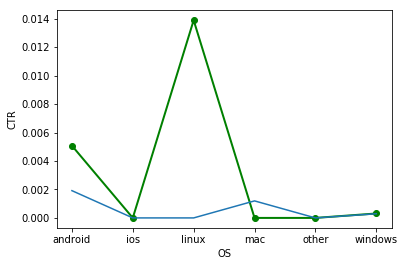

In [83]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = ['android','ios','linux','mac','other','windows']
y1 = os_CTR_1
y2 = os_CTR_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('OS')
plt.ylabel('CTR')
plt.show()
plt.legend() 

In [84]:
#se_df=df_train[df_train.advertiser == 2259] se2_df 2261
# br chrome 2259
br_ch=se_df.where(se_df['useragent'].str.contains('chrome')>0)

Clicks_br_ch = br_ch['click'].sum()
Imps_br_ch = br_ch['userid'].count()
CTR_br_ch=Clicks_br_ch/Imps_br_ch
CTR_br_ch

0.00024610491641898413

In [85]:
# br firefox 2259
br_fi=se_df.where(se_df['useragent'].str.contains('firefox')>0)

Clicks_br_fi = br_fi['click'].sum()
Imps_br_fi = br_fi['userid'].count()
CTR_br_fi=Clicks_br_fi/Imps_br_fi
CTR_br_fi

0.0

In [86]:
# br ie 2259
br_ie=se_df.where(se_df['useragent'].str.contains('windows_ie')>0)

Clicks_br_ie = br_ie['click'].sum()
Imps_br_ie = br_ie['userid'].count()
CTR_br_ie=Clicks_br_ie/Imps_br_ie
CTR_br_ie


0.00036082267570059737

In [87]:
# br maxthon 2259
br_ma=se_df.where(se_df['useragent'].str.contains('maxthon')>0)

Clicks_br_ma= br_ma['click'].sum()
Imps_br_ma = br_ma['userid'].count()
CTR_br_ma=Clicks_br_ma/Imps_br_ma
CTR_br_ma

0.0

In [88]:
# br opera 2259
br_op=se_df.where(se_df['useragent'].str.contains('opera')>0)

Clicks_br_op= br_op['click'].sum()
Imps_br_op = br_op['userid'].count()
CTR_br_op=Clicks_br_op/Imps_br_op
CTR_br_op

0.0

In [89]:
# br other 2259
br_ot=se_df.where(se_df['useragent'].str.contains('_other')>0)

Clicks_br_ot= br_ot['click'].sum()
Imps_br_ot = br_ot['userid'].count()
CTR_br_ot=Clicks_br_ot/Imps_br_ot
CTR_br_ot

0.0014388489208633094

In [90]:
# br safari 2259
br_sa=se_df.where(se_df['useragent'].str.contains('safari')>0)

Clicks_br_sa= br_sa['click'].sum()
Imps_br_sa = br_sa['userid'].count()
CTR_br_sa=Clicks_br_sa/Imps_br_sa
CTR_br_sa

0.00056369785794813977

In [91]:
# br sogou 2259
br_sog=se_df.where(se_df['useragent'].str.contains('sogou')>0)

Clicks_br_sog= br_sog['click'].sum()
Imps_br_sog = br_sog['userid'].count()
#CTR_br_sog=Clicks_br_sog/Imps_br_sog
CTR_br_sog=0.0

In [92]:
# br theworld 2259
br_th=se_df.where(se_df['useragent'].str.contains('theworld')>0)

Clicks_br_th= br_th['click'].sum()
Imps_br_th = br_th['userid'].count()
CTR_br_th=Clicks_br_th/Imps_br_th
CTR_br_th

0.0

In [93]:
# br chrome 2261
br_ch2=se2_df.where(se2_df['useragent'].str.contains('chrome')>0)

Clicks_br_ch2 = br_ch2['click'].sum()
Imps_br_ch2 = br_ch2['userid'].count()
CTR_br_ch2=Clicks_br_ch2/Imps_br_ch2
CTR_br_ch2

0.00013059262935199937

In [94]:
# br firefox 2261
br_fi2=se2_df.where(se2_df['useragent'].str.contains('firefox')>0)

Clicks_br_fi2 = br_fi2['click'].sum()
Imps_br_fi2= br_fi2['userid'].count()
CTR_br_fi2=Clicks_br_fi2/Imps_br_fi2
CTR_br_fi2

0.00086655112651646442

In [95]:
# br ie 2261
br_ie2=se2_df.where(se2_df['useragent'].str.contains('windows_ie')>0)

Clicks_br_ie2 = br_ie2['click'].sum()
Imps_br_ie2 = br_ie2['userid'].count()
CTR_br_ie2=Clicks_br_ie2/Imps_br_ie2
CTR_br_ie2

0.00038256717879659667

In [96]:
# br maxthon 2261
br_ma2=se2_df.where(se2_df['useragent'].str.contains('maxthon')>0)

Clicks_br_ma2= br_ma2['click'].sum()
Imps_br_ma2 = br_ma2['userid'].count()
CTR_br_ma2=Clicks_br_ma2/Imps_br_ma2
CTR_br_ma2

0.0

In [97]:
# br opera 2261
br_op2=se2_df.where(se2_df['useragent'].str.contains('opera')>0)

Clicks_br_op2= br_op2['click'].sum()
Imps_br_op2 = br_op2['userid'].count()
CTR_br_op2=Clicks_br_op2/Imps_br_op2
CTR_br_op2

0.0

In [98]:
# br other 2261
br_ot2=se2_df.where(se2_df['useragent'].str.contains('_other')>0)

Clicks_br_ot2= br_ot2['click'].sum()
Imps_br_ot2 = br_ot2['userid'].count()
CTR_br_ot2=Clicks_br_ot2/Imps_br_ot2
CTR_br_ot2

0.0012048192771084338

In [99]:
# br safari 2261
br_sa2=se2_df.where(se2_df['useragent'].str.contains('safari')>0)

Clicks_br_sa2= br_sa2['click'].sum()
Imps_br_sa2 = br_sa2['userid'].count()
CTR_br_sa2=Clicks_br_sa2/Imps_br_sa2
CTR_br_sa2

0.0011074197120708748

In [100]:
# br sogou 2261
br_sog2=se2_df.where(se2_df['useragent'].str.contains('sogou')>0)

Clicks_br_sog2= br_sog2['click'].sum()
Imps_br_sog2 = br_sog2['userid'].count()
CTR_br_sog2=Clicks_br_sog2/Imps_br_sog2
CTR_br_sog2

0.0

In [101]:
# br theworld 2261
br_th2=se2_df.where(se2_df['useragent'].str.contains('theworld')>0)

Clicks_br_th2= br_th2['click'].sum()
Imps_br_th2 = br_th2['userid'].count()
CTR_br_th2=Clicks_br_th2/Imps_br_th2
CTR_br_th2

0.0

In [102]:
br_CTR_1=[CTR_br_ch, CTR_br_fi, CTR_br_ie, CTR_br_ma,CTR_br_op,CTR_br_ot,CTR_br_sa,CTR_br_sog,CTR_br_th]
br_CTR_2=[CTR_br_ch2, CTR_br_fi2, CTR_br_ie2, CTR_br_ma2,CTR_br_op2,CTR_br_ot2,CTR_br_sa2,CTR_br_sog2,CTR_br_th2]

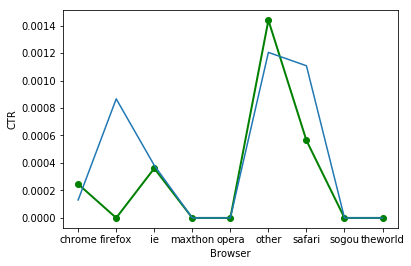

In [103]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = ['chrome','firefox','ie','maxthon','opera','other','safari','sogou','theworld']
y1 = br_CTR_1
y2 = br_CTR_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Browser')
plt.ylabel('CTR')
plt.show()
plt.legend() 

In [104]:
#se_df=df_train[df_train.advertiser == 2259] se2_df 2261
# ad 1 2259
ad_1=se_df.where(se_df['adexchange'].str.contains('1')>0)

Clicks_ad_1 = ad_1['click'].sum()
Imps_ad_1 = ad_1['userid'].count()
CTR_ad_1=Clicks_ad_1/Imps_ad_1
CTR_ad_1

0.0001069541594472609

In [105]:
# ad 2 2259
ad_2=se_df.where(se_df['adexchange'].str.contains('2')>0)

Clicks_ad_2 = ad_2['click'].sum()
Imps_ad_2 = ad_2['userid'].count()
CTR_ad_2=Clicks_ad_2/Imps_ad_2
CTR_ad_2

0.00019330727264916877

In [106]:
# ad 3 2259
ad_3=se_df.where(se_df['adexchange'].str.contains('3')>0)

Clicks_ad_3 = ad_3['click'].sum()
Imps_ad_3 = ad_3['userid'].count()
CTR_ad_3=Clicks_ad_3/Imps_ad_3
CTR_ad_3

0.00071842639845414455

In [107]:
# ad 1 2261
ad2_1=se2_df.where(se2_df['adexchange'].str.contains('1')>0)

Clicks_ad2_1 = ad2_1['click'].sum()
Imps_ad2_1 = ad2_1['userid'].count()
CTR_ad2_1=Clicks_ad2_1/Imps_ad2_1
CTR_ad2_1

0.00033737243104950941

In [108]:
# ad 2 2261
ad2_2=se2_df.where(se2_df['adexchange'].str.contains('2')>0)

Clicks_ad2_2 = ad2_2['click'].sum()
Imps_ad2_2 = ad2_2['userid'].count()
CTR_ad2_2=Clicks_ad2_2/Imps_ad2_2
CTR_ad2_2

0.00035302720831126912

In [109]:
# ad 3 2261
ad2_3=se2_df.where(se2_df['adexchange'].str.contains('3')>0)

Clicks_ad2_3 = ad2_3['click'].sum()
Imps_ad2_3 = ad2_3['userid'].count()
CTR_ad2_3=Clicks_ad2_3/Imps_ad2_3
CTR_ad2_3

0.00028656579550664831

In [110]:
ad_CTR_1=[CTR_ad_1,CTR_ad_2,CTR_ad_3]
ad_CTR_2=[CTR_ad2_1,CTR_ad2_2,CTR_ad2_3]

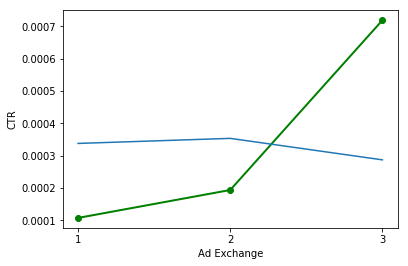

In [111]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = ['1','2','3']
y1 = ad_CTR_1
y2 = ad_CTR_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Ad Exchange')
plt.ylabel('CTR')
plt.show()
plt.legend()

In [143]:
#weekday-price
#se_df=df_train[df_train.advertiser == 2259]
wkd=[1,2,3,4,5,6,7]
for weekday in wkd:

    Week_df=se_df[se_df.weekday==weekday]
#Week1_df.head(5)
#Week1_df
    price= (Week_df['bidprice'].sum())/1000
    print(price)


7788.501
0.0
0.0
0.0
10565.508
9884.998
0.0


In [144]:
#se2_df=df_train[df_train.advertiser == 2261]
wkd=[1,2,3,4,5,6,7]
for weekday in wkd:

    Week_df2=se2_df[se2_df.weekday==weekday]
#Week1_df.head(5)
#Week1_df
    price= (Week_df2['bidprice'].sum())/1000
    print(price)

0.0
0.0
7152.158
9710.781
9756.291
5082.469
0.0


In [114]:
week_price_1=[7788.501,0.0,0.0,0.0,10565.508,9884.998,0.0]
week_price_2=[0.0,0.0,7152.158,9710.781,9756.291,5082.469,0.0]

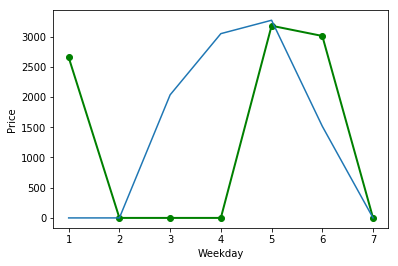

In [145]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = [1,2,3,4,5,6,7] 
y1 = week_price_1
y2 = week_price_2
plt.plot(x,y1,'go-', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Weekday')
plt.ylabel('Price')
plt.show()

In [147]:
hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for h in hour:

    hour_df2=se2_df[se2_df.hour==h]
    price2= (hour_df2['bidprice'].sum())/1000
   # print(price2)

In [148]:
hour_price_1=[787.059,396.629,272.42,298.636,217.473,230.23,247.7,263.501,480.993,716.14,984.867,975.297,959.214,973.364,987.2,954.822,969.154,855.237,478.906,376.831,2.565,0.0,0.0,0.0]
hour_price_2=[447.839,260.313,175.05,154.882,89.48,90.447,84.904,167.16,337.705,490.671,710.356,680.108,672.493,673.118,786.91,1195.719,1172.663,1087.201,596.76,0.0,0.0,0.0,0.0,0.0]

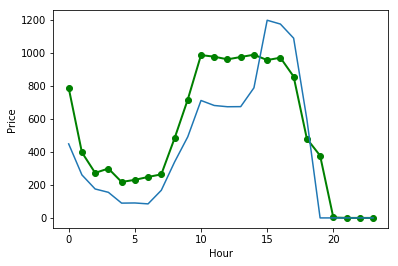

In [149]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y1 = hour_price_1
y2 = hour_price_2
plt.plot(x,y1,'go-', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()

In [150]:
#se_df=df_train[df_train.advertiser == 2259] se2_df 2261
# os window 2259
os_w=se_df.where(se_df['useragent'].str.contains('window')>0)
os_w_price= (os_w['bidprice'].sum())/(os_w['bidprice'].count())
#os android 2259
os_and=se_df.where(se_df['useragent'].str.contains('android')>0)
os_and_price= (os_and['bidprice'].sum())/(os_and['bidprice'].count())
#os ios 2259
os_ios=se_df.where(se_df['useragent'].str.contains('ios')>0)
os_ios_price= (os_ios['bidprice'].sum())/(os_ios['bidprice'].count())
#os linux 2259
os_lin=se_df.where(se_df['useragent'].str.contains('linux')>0)
os_lin_price= (os_lin['bidprice'].sum())/(os_lin['bidprice'].count())
#os other 2259
os_oth=se_df.where(se_df['useragent'].str.contains('other_')>0)
os_oth_price= (os_lin['payprice'].sum())/(os_lin['bidprice'].count())
#os mac 2259
os_mac=se_df.where(se_df['useragent'].str.contains('mac')>0)
os_mac_price= (os_mac['payprice'].sum())/(os_mac['bidprice'].count())



In [151]:
# os window 2261
os_w2=se2_df.where(se2_df['useragent'].str.contains('window')>0)
os_w_price2= (os_w2['bidprice'].sum())/(os_w2['bidprice'].count())
#os android 2261
os_and2=se2_df.where(se2_df['useragent'].str.contains('android')>0)
os_and_price2= (os_and2['bidprice'].sum())/(os_and2['bidprice'].count())
#os ios 2261
os_ios2=se2_df.where(se2_df['useragent'].str.contains('ios')>0)
os_ios_price2= (os_ios2['bidprice'].sum())/(os_ios2['bidprice'].count())
#os linux 2261
os_lin2=se2_df.where(se2_df['useragent'].str.contains('linux')>0)
os_lin_price2= (os_lin2['bidprice'].sum())/(os_lin2['bidprice'].count())
#os other 2261
os_oth2=se2_df.where(se2_df['useragent'].str.contains('other_')>0)
os_oth_price2= (os_lin2['bidprice'].sum())/(os_lin2['bidprice'].count())
#os mac 2261
os_mac2=se2_df.where(se2_df['useragent'].str.contains('mac')>0)
os_mac_price2= (os_mac2['bidprice'].sum())/(os_mac2['bidprice'].count())

In [152]:
os_price_1=[os_and_price, os_ios_price, os_lin_price, os_mac_price,os_oth_price,os_w_price]
os_price_2=[os_and_price2, os_ios_price2, os_lin_price2, os_mac_price2,os_oth_price2,os_w_price2]

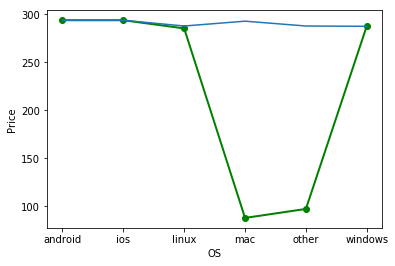

In [153]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = ['android','ios','linux','mac','other','windows']
y1 = os_price_1
y2 = os_price_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('OS')
plt.ylabel('Price')
plt.show()
plt.legend() 

In [154]:
#ad price
# ad 1 2259
ad_1=se_df.where(se_df['adexchange'].str.contains('1')>0)
ad_1_price= (ad_1['bidprice'].sum())/(ad_1['bidprice'].count())
# ad 2 2259
ad_2=se_df.where(se_df['adexchange'].str.contains('2')>0)
ad_2_price= (ad_2['bidprice'].sum())/(ad_2['bidprice'].count())
# ad 3 2259
ad_3=se_df.where(se_df['adexchange'].str.contains('3')>0)
ad_3_price= (ad_3['bidprice'].sum())/(ad_3['bidprice'].count())
# ad 1 2261
ad2_1=se2_df.where(se2_df['adexchange'].str.contains('1')>0)
ad2_1_price= (ad2_1['bidprice'].sum())/(ad2_1['bidprice'].count())
# ad 2 2261
ad2_2=se2_df.where(se2_df['adexchange'].str.contains('2')>0)
ad2_2_price= (ad2_2['bidprice'].sum())/(ad2_2['bidprice'].count())
# ad 3 2261
ad2_3=se2_df.where(se2_df['adexchange'].str.contains('3')>0)
ad2_3_price= (ad2_3['bidprice'].sum())/(ad2_3['bidprice'].count())


In [155]:
ad_price_1=[ad_1_price, ad_2_price, ad_3_price]
ad_price_2=[ad2_1_price, ad2_2_price, ad2_3_price]

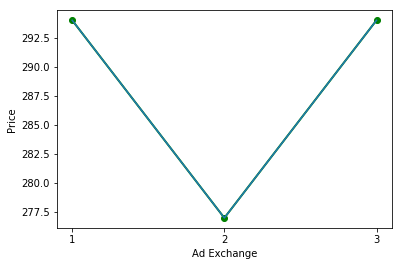

In [156]:
labels = ['2259', '2261']
colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)']
x = ['1','2','3']
y1 = ad_price_1
y2 = ad_price_2
plt.plot(x,y1,'go-', label='2259', linewidth=2)
plt.plot(x,y2)

plt.xlabel('Ad Exchange')
plt.ylabel('Price')
plt.show()
plt.legend() 

In [126]:
t0 = time.time()
df_val = pd.read_csv('./data/validation.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
df_val.head(5)

3.48 secs ==> pd.read_csv


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [127]:
ad_group2=df_val.groupby(df_train['advertiser'])
Clicks2 = ad_group2['click'].sum()
Bids2 = ad_group2['bidid'].count()
Imps2 = ad_group2['userid'].count()
Cost2 = (ad_group2['payprice'].sum())/1000
CTR2=Clicks2/Imps2
eCPC2=(Cost2)/Clicks2
CPM2=Cost2/Imps2*1000

In [128]:
df2=pd.DataFrame([Bids2,Imps2,Clicks2,Cost2,CTR2,CPM2,eCPC2],['Bids','Imps','Clicks','Cost','CTR','CPM','eCPC'])
df2.T

,Bids,Imps,Clicks,Cost,CTR,CPM,eCPC
advertiser,,,,,,,
1458,61302.0,61302.0,40.0,4808.549,0.000653,78.440328,120.213725
2259,16661.0,16661.0,11.0,1299.977,0.000660,78.025149,118.179727
2261,13939.0,13939.0,10.0,1083.644,0.000717,77.741875,108.364400
2821,26443.0,26443.0,21.0,2086.172,0.000794,78.893166,99.341524
2997,6330.0,6330.0,3.0,492.591,0.000474,77.818483,164.197000
3358,33327.0,33327.0,25.0,2623.255,0.000750,78.712605,104.930200
3386,56800.0,56800.0,36.0,4420.400,0.000634,77.823944,122.788889
3427,50510.0,50510.0,36.0,3947.731,0.000713,78.157414,109.659194
3476,38613.0,38613.0,20.0,3014.951,0.000518,78.081242,150.747550


## Problem 4

In [13]:
def read_file(path):
    t0 = time.time()
    df = pd.read_csv(path, na_values=['null', 'Na'])
    print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
    df['useragent_1'] = df['useragent'].apply(lambda x: x.split('_')[0])
    df['useragent_2'] = df['useragent'].apply(lambda x: x.split('_')[1])
    return df

In [14]:
df_train = read_file('./data/train.csv')
#df_train.head(5)
df_val = read_file('./data/validation.csv')
#df_val.head(5)
df_test = read_file('./data/test.csv')
#df_test.head(5)

34.72 secs ==> pd.read_csv
3.34 secs ==> pd.read_csv
2.93 secs ==> pd.read_csv


In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
from sklearn.ensemble import GradientBoostingClassifier

/Users/wanghan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
def to_index(df, feature):
    return LabelEncoder().fit_transform(df[feature].values)

def to_one_hot(df, features):
    return OneHotEncoder().fit_transform(df[features].values).toarray()

def hour_fn(hour):
    if hour <= 6:
        return 0
    if 6 < hour <= 12:
        return 1
    if 12 < hour <= 18:
        return 2
    if 18 < hour <= 24:
        return 3

def slot_width_fn(width):
    if width <= 300:
        return 0
    if 300 < width <= 728:
        return 1
    if width > 728:
        return 2

def slot_height_fn(height):
    if height <= 100:
        return 0
    if 100 < height <= 240:
        return 1
    if height > 240:
        return 2

def slot_height_fn(height):
    if height <= 100:
        return 0
    if 100 < height <= 240:
        return 1
    if height > 240:
        return 2
    
def city_fn(city):
    if city <= 93:
        return 0
    if 93 < city <= 187:
        return 1
    if 187 < city <= 303:
        return 2
    if city > 303:
        return 3

def city_fn(city):
    if city <= 93:
        return 0
    if 93 < city <= 187:
        return 1
    if 187 < city <= 303:
        return 2
    if city > 303:
        return 3
    
def region_fn(region):
    if region <= 65:
        return 0
    if 65 < region <= 183:
        return 1
    if 183 < region <= 325:
        return 2
    if region > 325:
        return 3
    
def slot_price_fn(price):
    if price <= 50:
        return 0
    if 50 < price <= 98:
        return 1
    if price > 98:
        return 2
    
def preprocess(df):
    df['hour'] = df['hour'].apply(hour_fn)
    df['slotwidth'] = df['slotwidth'].apply(slot_width_fn)
    df['slotheight'] = df['slotheight'].apply(slot_height_fn)
    df['city'] = df['city'].apply(city_fn)
    df['region'] = df['region'].apply(region_fn)
    df['slotvisibility'] = df['slotvisibility'].apply(lambda x: str(x))
    df['slotformat'] = df['slotformat'].apply(lambda x: str(x))
    df['adexchange'] = df['adexchange'].apply(lambda x: str(x))
    df['slotprice'] = df['slotprice'].apply(slot_price_fn)
    
    for feat in ['useragent_1', 'useragent_2', 'advertiser', 'slotvisibility', 'slotformat', 'adexchange']:
        df[feat] = to_index(df, feat)
    
    one_hot = to_one_hot(df,
        ['weekday', 'hour', 'useragent_1', 'useragent_2', 'city', 'region', 'adexchange',
         'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
         'advertiser',])
    
    return one_hot


In [ ]:
#评价的方法
def simulation(df, bid_vals, base_bid):
    budget = 6250
    paid = 0
    clicks = 0
    for idx, row in df.iterrows():
        if paid > budget:
            break
        
        if bid_vals[idx] >= row['payprice']:
            if row['click'] == 1:
                clicks += 1
            paid += (row['payprice'] / 1000)
    return clicks, paid, idx, len(df)

In [ ]:
#画ROC曲线的方法
def plot_roc(y_val, y_val_proba):
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    f, axes = plt.subplots(1, figsize=(8, 5))
    lab = 'AUC=%.5f' % auc(fpr, tpr)
    axes.step(fpr, tpr, lw=2,label=lab)
    axes.legend(loc='lower right', fontsize='small')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
ratio = 100
pos_df = df_train[df_train['click']==1]
neg_df = df_train[df_train['click']==0]
reduced_neg_df = neg_df.sample(ratio*len(pos_df), random_state=100)
down_sample_df = pd.concat([pos_df]+[reduced_neg_df], ignore_index=True)

X_train = preprocess(down_sample_df.copy())
y_train = down_sample_df['click'].values

X_val = preprocess(df_val.copy())
y_val = df_val['click'].values

print(X_train.shape, X_val.shape)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

for clf_name, clf in [('Gradient Boosting', GradientBoostingClassifier()),
                      ('Random Forest', RandomForestClassifier()),
                      ('XGBoost', XGBClassifier()),
                      ('Adaboosting',AdaBoostClassifier())]:
    
    clf.fit(X_train, y_train)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_proba))
    print("AUC=%.3f | RMSE=%.3f | %s" % (auc(fpr, tpr), rmse, clf_name))


    
    

In [ ]:
clf1 = GradientBoostingClassifier()
clf1.fit(X_train, y_train)
y_val_pred1 = clf1.predict(X_val)
y_val_proba1 = clf1.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba1)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba1
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (Gradient Boosting)| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_val_pred2 = clf2.predict(X_val)
y_val_proba2 = clf2.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba2)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba2
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (Random Forest| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf3 = XGBClassifier()
clf3.fit(X_train, y_train)
y_val_pred3 = clf3.predict(X_val)
y_val_proba3 = clf3.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba3)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba3
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (XGBoost| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf4 = AdaBoostClassifier()
clf4.fit(X_train, y_train)
y_val_pred4 = clf4.predict(X_val)
y_val_proba4 = clf4.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba4)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba4
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (Adaboosting)| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
y_val_proba = clf.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (logistic| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf_name=['Random Forest','Gradient Boosting','XGBoost','Adaboosting']
AUC=[0.619,0.737,0.741,0.735]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(clf_name, AUC)
plt.title('AUC of different model')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.show()

In [ ]:
clf_name=['Random Forest','Gradient Boosting','XGBoost','Adaboosting']
Clicks=[73,128,126,51]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(clf_name, Clicks)
plt.title('Clicks of different model')
plt.xlabel('Model')
plt.ylabel('Clicks')
plt.show()

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
model_name='new_XGBoost'
model=XGBClassifier(colsample_bytree=0.7, learning_rate=0.03,
                   max_depth=5,min_child_weight=4,
                   n_estimators=500, nthread=4,
                  silent=1, subsample=0.7)
model.fit(X_train, y_train)

y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
rmse = np.sqrt(mean_squared_error(y_val, y_val_proba))
print("AUC=%.3f | RMSE=%.3f | %s" % (auc(fpr, tpr), rmse, model_name))

y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]
plot_roc(y_val, y_val_proba)

avgCTR = df_train['click'].values.mean()
base_bid = 5.5
pCTRs = y_val_proba
bid_vals = pCTRs * base_bid / avgCTR
print(bid_vals)

clicks, paid, idx, total_rows = simulation(df_val, bid_vals, base_bid)
print("Linear Bidding (new_XGBoost)| Clicks: %d | Paid: %d | Rows: %d / %d" % (clicks, paid, idx, total_rows))

In [ ]:
clf_name=['XGBoost','new_XGBoost']
AUC=[0.741,0.805 ]

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.bar(clf_name, AUC)
plt.title('AUC of different model')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.show()